In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import optimize
import pandas as pd
i = 0


In [ ]:
# глобальные функции

def lower_upper_limits(domain, fun, popt, err, nsigma=1):
    '''Вычисляет минимальные и максимальные значения функции 
    при заданных парамерах и стандартных отклонениях
    в пределах nsigma*стандартное отклонение
    Возвращает:
    minA :(np.array) - массив минимальных значений
    maxA :(np.array) - массив максимальных значений'''
    steps_number = 8    
    # кол-во перебираемых значений каждого параметра
    # осторожно! сложность алгоритма O(steps_number^parametes_number)
    allValues = np.zeros((steps_number**popt.size, teorPoints))

    def iter_deviation(pars, errors, fun, par_index=0, deviation=None, i=0):
        if deviation is None:
            deviation = np.zeros_like(pars)
        if pars.size == par_index:
            allValues[i] = fun(domain, *(popt+deviation))
            i+=1
        else:
            for deviation[par_index] in np.linspace(-errors[par_index]*nsigma,
            errors[par_index]*nsigma, steps_number):
                i = iter_deviation(pars, errors, fun, par_index=par_index+1, deviation=deviation, i=i)
        return i
    
    iter_deviation(popt, err, fun)
    maxA = allValues.max(axis=0)
    minA = allValues.min(axis=0)
    return minA, maxA


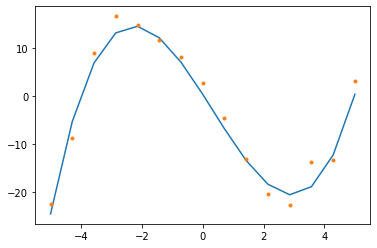

In [19]:
# data generation

def cub(x, a, b, c, d):
    return a*x**3 + b*x**2 + c*x + d
true_params = [0.5, -0.5, -10, 0.4]
x = np.linspace(-5, 5, 15)
error = 0.5
y = cub(x, *true_params)
noize = (np.random.normal(0, error, x.size))*np.mean(y)
y += noize
plt.plot(x, cub(x, *true_params)) 
plt.plot(x, y, '.') 

In [29]:
maxA = cub(X, *popt)+10
minA = cub(X, *popt)-10

0.52192249117879 0.02976715399478659
-0.4879186331917056 0.0792306853089969
-10.324001315091056 0.551812717557398
1.1161271709542686 1.0093550323076506


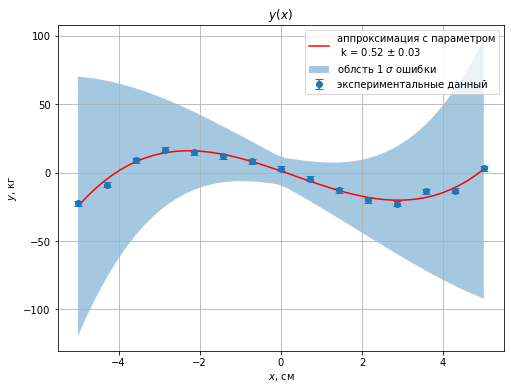

In [73]:
def err_pres_formatter(value, error):
    """Rounds value and it's error according to scientific conventions"""
    first_digit = (np.array(error/10**np.floor(np.log10(error)), dtype="int"))
    first_digit_position = np.array(np.floor(np.log10(error)), dtype="int")
    ndigits = 1
    if first_digit == 1:
        ndigits += 1
    return round(value, -first_digit_position + ndigits-1), round(error, -first_digit_position + ndigits-1)

# function to approximate
def f(x, k, b):
    return b + k * x
f = cub
teorPoints = 50     

from scipy.optimize import curve_fit
popt, pcov = curve_fit(f, x, y)
err = np.sqrt(np.diag(pcov))
for v, er in zip(popt, err):
    print(v, er)

plt.figure(figsize=(8, 6))
plt.errorbar(x, y, fmt="o", yerr=error*y.mean(), label="экспериментальные данный", capsize=4, ms=6)
X = np.linspace(x.min(), x.max(), num=teorPoints)
plt.plot(X, f(X, *popt), 'r', label=
"аппроксимация с параметром\n k = {} $\pm$ {}".format(*err_pres_formatter(popt[0], err[0])))
nsigma = 1
minA, maxA = lower_upper_limits(X, f, popt, err, nsigma=nsigma)
plt.fill_between(X, minA, maxA, alpha=0.4, label=f"облсть {nsigma} $\sigma$ ошибки")

# # плохой способ
# plt.fill_between(X, f(X, *(popt+err)), f(X, *(popt-err)), alpha=0.4)


plt.grid(True)
plt.xlabel(r"$x$, см")
plt.ylabel(r"$y$, кг")
plt.title(r"$y(x)$")
plt.legend()

plt.savefig(f"opt{i}.png", dpi=200)
i+=1

In [36]:
maxA = f(X, *popt)
minA = f(X, *popt)

In [1]:
steps_number = 16
nsigma = 10
dev = np.zeros_like(popt)
allValues = np.zeros((steps_number**popt.size, X.size))

def iter_deviation(pars, errors, fun, par_index=0, deviation=None, i=0):
    if deviation is None:
        deviation = np.zeros_like(pars)
    if pars.size == par_index:
        allValues[i] = fun(X, *(popt+deviation))
        i+=1
    else:
        for deviation[par_index] in np.linspace(-errors[par_index]*nsigma,
        errors[par_index]*nsigma, steps_number):
            i = iter_deviation(pars, errors, fun, par_index=par_index+1, deviation=deviation, i=i)
    return i

print(iter_deviation(popt, err, f))
maxA = allValues.max(axis=0)
minA = allValues.min(axis=0)


NameError: name 'np' is not defined

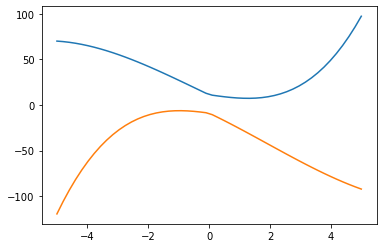

In [72]:
plt.plot(X, maxA)
plt.plot(X, minA)